In [1]:
import os

In [2]:
def mkdir(p):
   if not os.path.exists(p):
        os.mkdir(p)

def link(src,dst):
    if not os.path.exists(dst):
        os.symlink(src,dst,target_is_directory=True)

In [3]:
classes=[
    'angry',
    'disgust',
    'fear',
    'happy',
    'neutral',
    'sad',
    'surprise'
]

In [4]:
train_path_from = os.path.abspath('C:/Users/Elie/Downloads/facial_emotions/train')

In [5]:
valid_path_from = os.path.abspath('C:/Users/Elie/Downloads/facial_emotions/test')

In [6]:
train_path_to = os.path.abspath('C:/Users/Elie/Downloads/facial_emotions/training')
valid_path_to = os.path.abspath('C:/Users/Elie/Downloads/facial_emotions/validation')

In [7]:
mkdir(train_path_to)
mkdir(valid_path_to)

In [8]:
for c in classes:
    print(c)

angry
disgust
fear
happy
neutral
sad
surprise


In [9]:
for c in classes:
    link(train_path_from + '/' + c, train_path_to + '/' + c)
    link(valid_path_from +'/' + c, valid_path_to + '/' + c)

In [47]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [11]:
TRAIN_PATH = os.path.abspath('C:/Users/Elie/Downloads/facial_emotions/training')
TEST_PATH = os.path.abspath('C:/Users/Elie/Downloads/facial_emotions/validation')

In [36]:
IMAGE_SIZE = [100, 100]
BATCH_SIZE = 32
EPOCHS = 5

In [13]:
train_image_files = glob(TRAIN_PATH + '/*/*.jp*g')
valid_image_files = glob(TEST_PATH + '/*/*.jp*g')

In [14]:
folders = glob(TRAIN_PATH +"/*")
folders

['C:\\Users\\Elie\\Downloads\\facial_emotions\\training\\angry',
 'C:\\Users\\Elie\\Downloads\\facial_emotions\\training\\disgust',
 'C:\\Users\\Elie\\Downloads\\facial_emotions\\training\\fear',
 'C:\\Users\\Elie\\Downloads\\facial_emotions\\training\\happy',
 'C:\\Users\\Elie\\Downloads\\facial_emotions\\training\\neutral',
 'C:\\Users\\Elie\\Downloads\\facial_emotions\\training\\sad',
 'C:\\Users\\Elie\\Downloads\\facial_emotions\\training\\surprise']

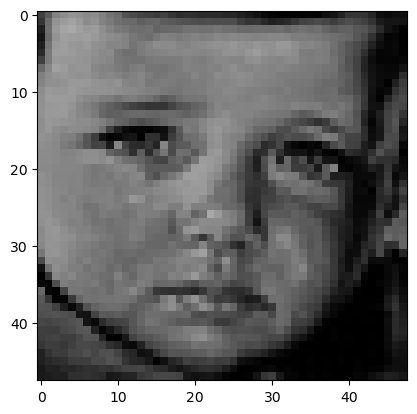

In [15]:
plt.imshow(image.load_img(np.random.choice(train_image_files)))

In [16]:
model = VGG16(input_shape=IMAGE_SIZE +[3],
      weights="imagenet", include_top = False)

In [17]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [18]:
model.output

<KerasTensor: shape=(None, 3, 3, 512) dtype=float32 (created by layer 'block5_pool')>

In [19]:
x = Flatten()(model.output)

In [20]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [21]:
len(folders)

7

In [22]:
model.input

<KerasTensor: shape=(None, 100, 100, 3) dtype=float32 (created by layer 'input_1')>

In [23]:
model = Model(inputs= model.input, outputs=prediction)

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [26]:
dataset_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
    )

In [27]:
preprocess_input

<function keras.applications.vgg16.preprocess_input(x, data_format=None)>

In [28]:
test_gen = dataset_generator.flow_from_directory(TEST_PATH,target_size=IMAGE_SIZE, batch_size= BATCH_SIZE)

Found 7178 images belonging to 7 classes.


In [29]:
test_gen.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [30]:
labels = list(test_gen.class_indices.keys())
labels

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -117.68000030517578, max: 151.06100463867188


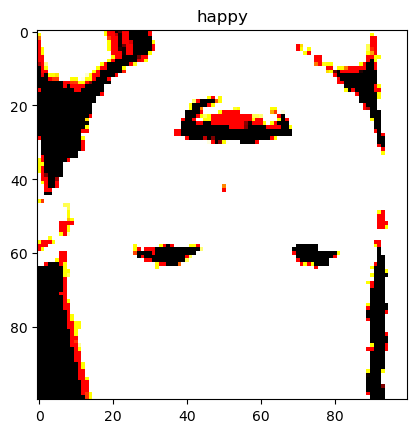

In [31]:
for x,y in test_gen:
    print(f"min: {x[0].min()}, max: {x[0].max()}")
    plt.title(labels[np.argmax(y[0])])
    plt.imshow(x[0])
    plt.show()
    break

C:\Users\Elie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

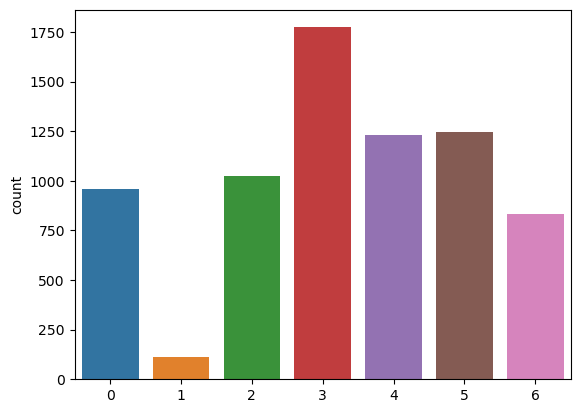

In [32]:
import seaborn as sns
sns.countplot(test_gen.classes)

In [33]:
train_generator = dataset_generator.flow_from_directory(
    TRAIN_PATH,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size = BATCH_SIZE,
    class_mode="categorical")

Found 28709 images belonging to 7 classes.


In [34]:
valid_generator = dataset_generator.flow_from_directory(
    TEST_PATH,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size = BATCH_SIZE,
    class_mode="categorical")

Found 7178 images belonging to 7 classes.


In [37]:
history = model.fit(train_generator,
                    validation_data = valid_generator,
                    epochs= EPOCHS,
                    steps_per_epoch= len(train_image_files)//BATCH_SIZE,
                    validation_steps = len(valid_image_files)//BATCH_SIZE)

Epoch 1/5
897/897 [==============================] - 7529s 8s/step - loss: 1.8915 - accuracy: 0.2420 - val_loss: 1.7739 - val_accuracy: 0.2620
Epoch 2/5
897/897 [==============================] - 28885s 32s/step - loss: 1.7553 - accuracy: 0.2820 - val_loss: 1.7037 - val_accuracy: 0.2903
Epoch 3/5
897/897 [==============================] - 6249s 7s/step - loss: 1.7012 - accuracy: 0.3054 - val_loss: 1.6381 - val_accuracy: 0.3471
Epoch 4/5
897/897 [==============================] - 6517s 7s/step - loss: 1.6293 - accuracy: 0.3593 - val_loss: 1.5741 - val_accuracy: 0.3846
Epoch 5/5
897/897 [==============================] - 6187s 7s/step - loss: 1.5741 - accuracy: 0.3831 - val_loss: 1.5280 - val_accuracy: 0.4035


In [38]:
model.evaluate(valid_generator)


225/225 [==============================] - 470s 2s/step - loss: 1.5223 - accuracy: 0.4097


[1.5223127603530884, 0.4097241461277008]

In [55]:
img_path = np.random.choice(valid_image_files)
img = image.load_img(img_path, target_size=IMAGE_SIZE)

In [57]:
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [58]:
prediction = model.predict(img_array)[0]
predicted_label_index = np.argmax(prediction)
predicted_label = labels[predicted_label_index]

1/1 [==============================] - 0s 357ms/step


In [60]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_gen = valid_datagen.flow_from_directory(
    directory=TEST_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 7178 images belonging to 7 classes.


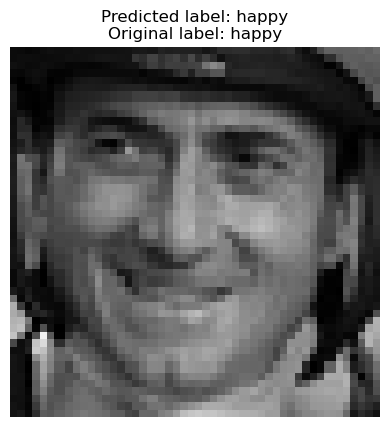

In [62]:
original_label_index = valid_gen.classes[valid_gen.filepaths.index(img_path)]
original_label = labels[original_label_index]
plt.imshow(img)
plt.title(f"Predicted label: {predicted_label}\nOriginal label: {original_label}")
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 287ms/step


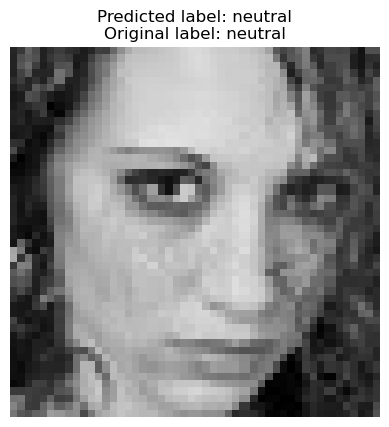

In [79]:
img_path = np.random.choice(valid_image_files)
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_array)[0]
predicted_label_index = np.argmax(prediction)
predicted_label = labels[predicted_label_index]
original_label_index = valid_gen.classes[valid_gen.filepaths.index(img_path)]
original_label = labels[original_label_index]
plt.imshow(img)
plt.title(f"Predicted label: {predicted_label}\nOriginal label: {original_label}")
plt.axis("off")
plt.show()

In [81]:
#saving this model in django

model.save('C:/Users/Elie/djangoAi/djangoAi/savedModels')

INFO:tensorflow:Assets written to: C:/Users/Elie/djangoAi/djangoAi/savedModels\assets


INFO:tensorflow:Assets written to: C:/Users/Elie/djangoAi/djangoAi/savedModels\assets


In [108]:
img_path = np.random.choice(valid_image_files)
img = image.load_img(img_path, target_size=IMAGE_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)



In [103]:
img_array[0].shape

(100, 100, 3)

In [112]:
img_path = np.random.choice(valid_image_files)
img = Image.open(img_path)
img = img.resize((100, 100))
img = img.convert('RGB')
# Convert the image to a numpy array
img_array = np.array(img)

# Add a fourth dimension to the image array
img_array = np.expand_dims(img_array, axis=0)


In [113]:
img_array[0].shape

(100, 100, 3)

1/1 [==============================] - 3s 3s/step


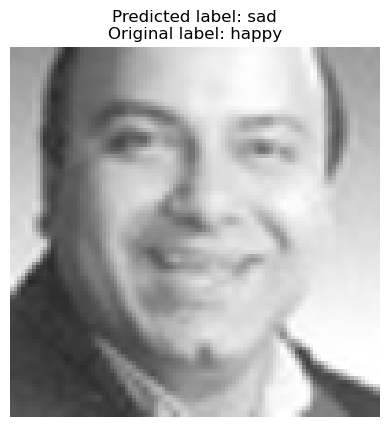

In [114]:
prediction = model.predict(img_array)[0]
predicted_label_index = np.argmax(prediction)
predicted_label = labels[predicted_label_index]
original_label_index = valid_gen.classes[valid_gen.filepaths.index(img_path)]
original_label = labels[original_label_index]
plt.imshow(img)
plt.title(f"Predicted label: {predicted_label}\nOriginal label: {original_label}")
plt.axis("off")
plt.show()